In [25]:
# Memprediksi jumlah gempa di masa depan, khususnya untuk dekade 2030–2040, sebagai proyeksi berbasis data historis (bukan sistem peringatan dini).

A. Prediksi Dekade 2030–2040 dengan ARIMA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [3]:
# === 1. Load Data ===
df = pd.read_csv("seismic_gap_clean.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df = df.dropna(subset=['date'])
df['year'] = df['date'].dt.year

# Hitung jumlah gempa per tahun
yearly_quakes = df[df['year'] >= 1982]['year'].value_counts().sort_index()
yearly_quakes = yearly_quakes.reset_index()
yearly_quakes.columns = ['year', 'count']
yearly_quakes = yearly_quakes.set_index('year')

In [4]:
# === 2. Uji Stasioneritas (ADF Test) ===
result = adfuller(yearly_quakes['count'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
if result[1] > 0.05:
    print("⛔ Data tidak stasioner (p > 0.05), perlu differencing.")
else:
    print("✅ Data stasioner (p ≤ 0.05)")

ADF Statistic: -2.2789
p-value: 0.1789
⛔ Data tidak stasioner (p > 0.05), perlu differencing.


<Figure size 1200x400 with 0 Axes>

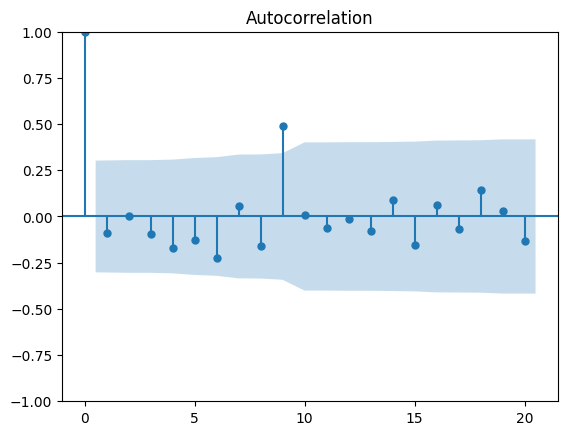

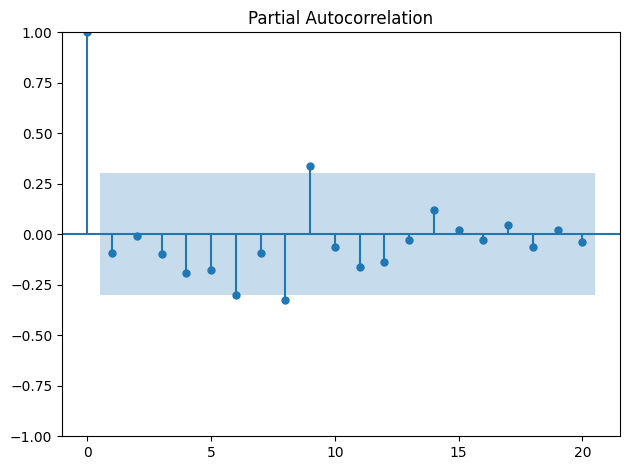

In [5]:
# === 3. Plot ACF dan PACF ===
plt.figure(figsize=(12, 4))
plot_acf(yearly_quakes['count'].diff().dropna(), lags=20)
plot_pacf(yearly_quakes['count'].diff().dropna(), lags=20)
plt.tight_layout()
plt.show()

In [13]:
# === 4. Fit ARIMA (contoh: 2,1,2) ===
model = ARIMA(yearly_quakes['count'], order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\fmoch\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\fmoch\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\fmoch\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\fmoch\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sa

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   43
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -309.581
Date:                Mon, 23 Jun 2025   AIC                            629.163
Time:                        12:52:32   BIC                            637.851
Sample:                             0   HQIC                           632.347
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1921      0.305     -0.630      0.529      -0.790       0.406
ar.L2          0.5390      0.322      1.676      0.094      -0.091       1.169
ma.L1          0.1444      0.260      0.555      0.5

In [14]:
# === 5. Prediksi 2025–2040 ===
forecast_years = list(range(2025, 2041))
n_steps = len(forecast_years)

forecast = model_fit.get_forecast(steps=n_steps)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_df = pd.DataFrame({
    'year': forecast_years,
    'predicted_count': predicted_mean.values,
    'lower_ci': conf_int.iloc[:, 0].values,
    'upper_ci': conf_int.iloc[:, 1].values
}).set_index('year')

C:\Users\fmoch\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\fmoch\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


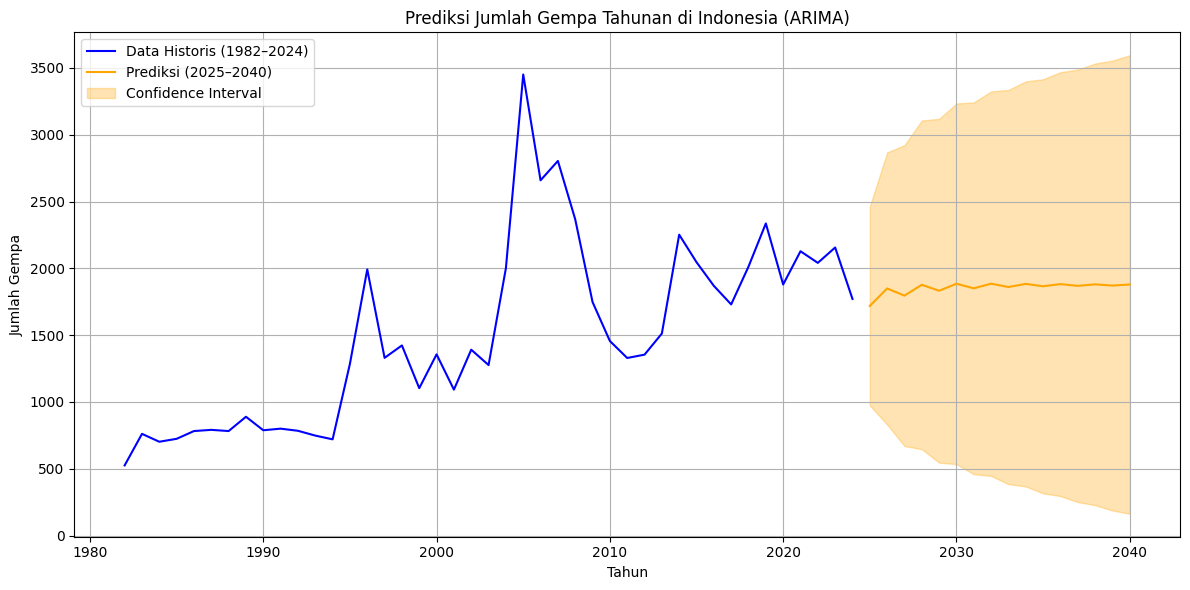

In [15]:
# === 6. Gabung dan Visualisasi ===
plt.figure(figsize=(12, 6))
plt.plot(yearly_quakes, label='Data Historis (1982–2024)', color='blue')
plt.plot(forecast_df['predicted_count'], label='Prediksi (2025–2040)', color='orange')
plt.fill_between(forecast_df.index, forecast_df['lower_ci'], forecast_df['upper_ci'], 
                 color='orange', alpha=0.3, label='Confidence Interval')
plt.title("Prediksi Jumlah Gempa Tahunan di Indonesia (ARIMA)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Gempa")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

B. Prediksi Jumlah Gempa dengan Prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [32]:

# Load dan olah data
df = pd.read_csv("seismic_gap_clean.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df = df.dropna(subset=['date'])

# Hitung jumlah gempa per tahun sejak 1982
df['year'] = df['date'].dt.year
yearly_quakes = df[df['year'] >= 1982]['year'].value_counts().sort_index().reset_index()
yearly_quakes.columns = ['ds', 'y']
yearly_quakes['ds'] = pd.to_datetime(yearly_quakes['ds'], format='%Y')


In [33]:
model = Prophet(yearly_seasonality=False, daily_seasonality=False)
model.fit(yearly_quakes)


13:15:07 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Buat future frame sampai 2040
future = model.make_future_dataframe(periods=16, freq='Y')  # 2025–2040
forecast = model.predict(future)

# Filter hanya prediksi tahun 2030–2040
forecast_2030s = forecast[forecast['ds'].dt.year.between(2030, 2040)]

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


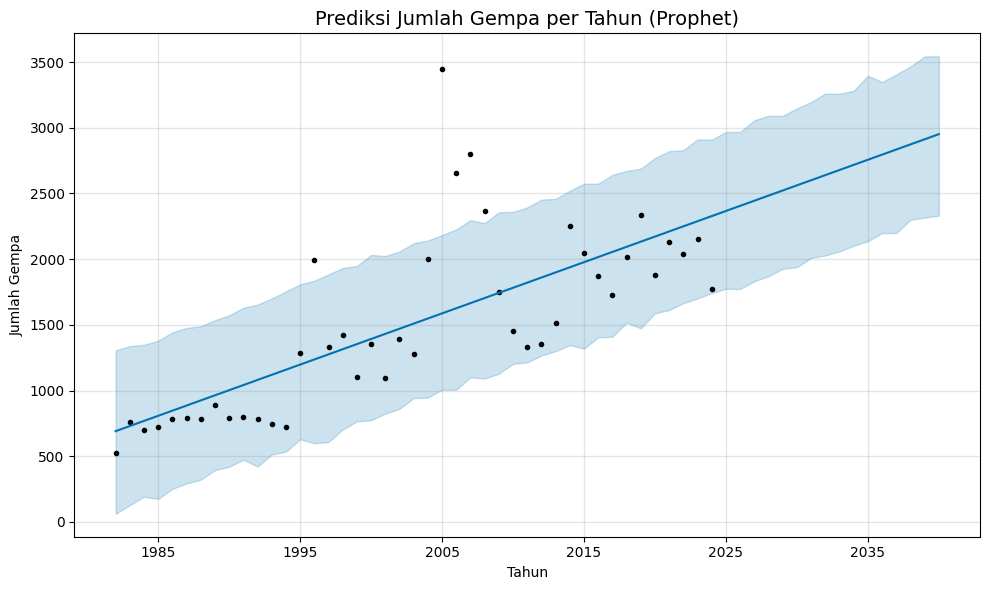

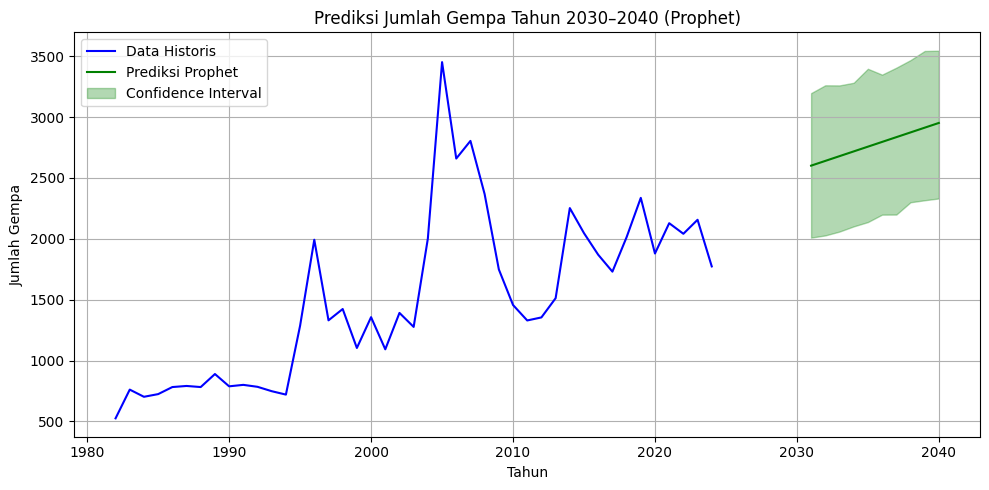

In [ ]:
# Plot prediksi full
fig = model.plot(forecast)
plt.title("Prediksi Jumlah Gempa per Tahun (Prophet)", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Gempa")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot hanya 2030–2040 (zoom-in)
plt.figure(figsize=(10, 5))
plt.plot(yearly_quakes['ds'], yearly_quakes['y'], label='Data Historis', color='blue')
plt.plot(forecast_2030s['ds'], forecast_2030s['yhat'], label='Prediksi Prophet', color='green')
plt.fill_between(forecast_2030s['ds'    ], forecast_2030s['yhat_lower'], forecast_2030s['yhat_upper'], color='green', alpha=0.3, label='Confidence Interval')
plt.title("Prediksi Jumlah Gempa Tahun 2030–2040 (Prophet)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Gempa")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
